In [169]:
# Import necessary libraries
import numpy as np
import pandas as pd


In [170]:
data = pd.read_csv('/Users/elahehbeheshti/Desktop/Fall2024/logistic regression dataset-Social_Network_Ads.csv')


In [171]:
# Drop the 'User ID' column as it is not useful for the model
data = data.drop(['User ID'], axis=1)

In [172]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [173]:
# Separate the features and target variable
X = data.drop(['Purchased'], axis=1)  # Features (Gender, Age, EstimatedSalary)
y = data['Purchased']                 # Target variable (Purchased)

In [174]:
print("Data before encoding:")
print(X.head())


Data before encoding:
   Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000


In [175]:

# Encode Gender column: Male = 1, Female = 0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [176]:
print("Data after encoding:")
print(X.head())

Data after encoding:
   Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000


In [177]:
# Separate features (X) and target (y)
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [178]:
from sklearn.model_selection import train_test_split  #(train_test_split)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [179]:
X_test.shape, y_test.shape

((100, 3), (100,))

In [180]:
X_train.shape, y_train.shape

((300, 3), (300,))

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score
import matplotlib.pyplot as plt

In [183]:
# Create the SVM model
model = SVC(kernel='linear')  # Define a linear kernel SVM model
model.fit(X_train, y_train)  # Fit the model to the training data


SVC(kernel='linear')

In [184]:
y_prediction_train = model.predict(X_train)
y_prediction_test = model.predict(X_test)

In [185]:
acc_train_linear = accuracy_score(y_true=y_train, y_pred=y_prediction_train)
acc_test_linear= accuracy_score(y_true=y_test, y_pred=y_prediction_test)

acc_train_linear , acc_test_linear
#on train data we have 82% accuracy and on test data we have 87% accuracy
#These two number are almost close and acceptable

(0.82, 0.87)

In [186]:
P_linear = precision_score(y_test, y_prediction_test)
r_linear= recall_score(y_test, y_prediction_test)

P,r

(0.9615384615384616, 0.6756756756756757)

In [187]:
print(confusion_matrix(y_test, y_prediction_test))
print(classification_report(y_test, y_prediction_test))

[[62  1]
 [12 25]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        63
           1       0.96      0.68      0.79        37

    accuracy                           0.87       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.88      0.87      0.86       100



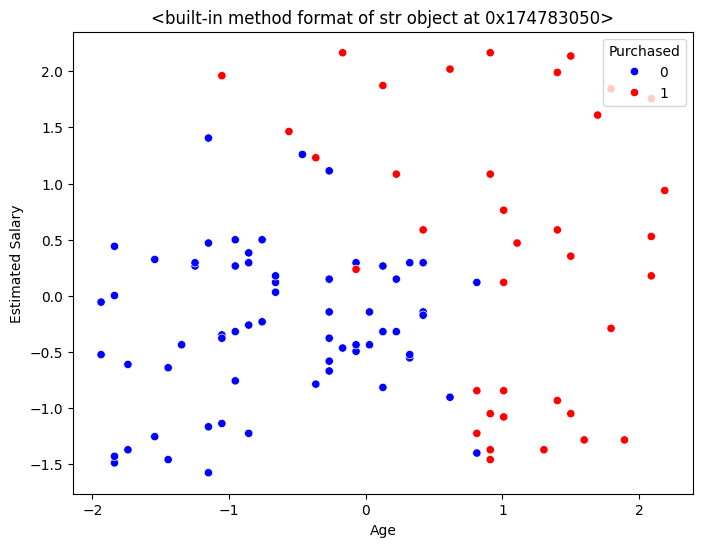

In [188]:
# Visualize the decision boundary with accuracy information
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 1], y=X_test[:, 2], hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format)
plt.legend(title="Purchased", loc="upper right")

plt.show()

#recall is prety low

In [189]:
##changing from linear kernel to rbf kernel to see the accuracy

model2 = SVC(kernel='rbf')  # Define a linear kernel SVM model
model2.fit(X_train, y_train)  # Fit the model to the training data

SVC()

In [190]:
y_prediction_train = model2.predict(X_train)
y_predicttion_test = model2.predict(X_test)

In [191]:
acc_train_rbf = accuracy_score(y_true=y_train, y_pred=y_prediction_train)
acc_test_rbf= accuracy_score(y_true=y_test, y_pred=y_predicttion_test)

acc_train_rbf , acc_test_rbf

(0.91, 0.93)

The accuracy on trained data has changed from 82% to 91% and on test data has changed fromm 87% to 93%

In [192]:
P_rbf= precision_score(y_test, y_predicttion_test)
r_rbf= recall_score(y_test, y_predicttion_test)

P_rbf,r_rbf

(0.875, 0.9459459459459459)

percision has decreaased from 96% to 87.5% and recall has increased from  67% to 94%

Rbf has more complex border than linear

In [193]:

print("Confusion Matrix for RBF Kernel:")
print(confusion_matrix(y_test, y_prediction_test))

print("classification_repor:")

print(classification_report(y_test, y_prediction_test))

Confusion Matrix for RBF Kernel:
[[62  1]
 [12 25]]
classification_repor:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        63
           1       0.96      0.68      0.79        37

    accuracy                           0.87       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.88      0.87      0.86       100



In [194]:
##changing to sigmoid kernel to see the accuracy

model3 = SVC(kernel='sigmoid')  # Define a linear kernel SVM model
model3.fit(X_train, y_train)  # Fit the model to the training data

SVC(kernel='sigmoid')

In [195]:
y_prediction_train = model3.predict(X_train)
y_predicttion_test = model3.predict(X_test)

In [196]:
acc_train_sigmoid = accuracy_score(y_true=y_train, y_pred=y_prediction_train)
acc_test_sigmoid= accuracy_score(y_true=y_test, y_pred=y_predicttion_test)

acc_train_sigmoid , acc_test_sigmoid

(0.7566666666666667, 0.89)

In [197]:
P_sigmoid= precision_score(y_test, y_predicttion_test)
r_sigmoid= recall_score(y_test, y_predicttion_test)

P_sigmoid,r_sigmoid

(0.90625, 0.7837837837837838)

In [198]:
print(confusion_matrix(y_test, y_prediction_test))
print(classification_report(y_test, y_prediction_test))


[[62  1]
 [12 25]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        63
           1       0.96      0.68      0.79        37

    accuracy                           0.87       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.88      0.87      0.86       100



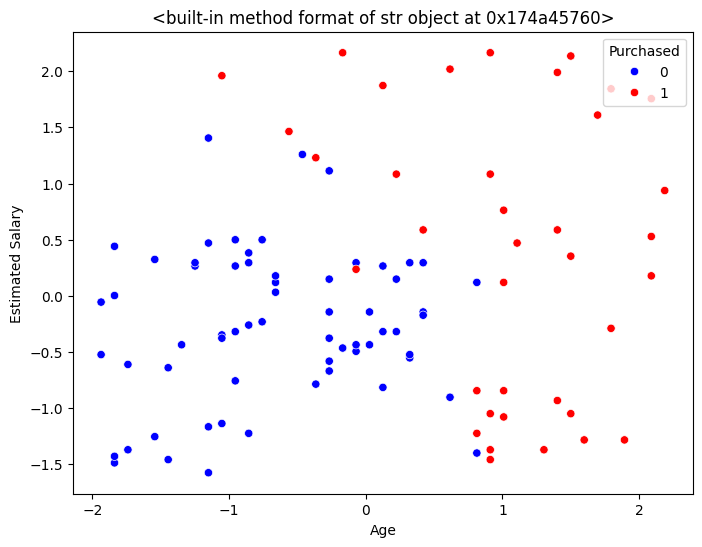

In [199]:
# Visualize the decision boundary with accuracy information
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 1], y=X_test[:, 2], hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format)
plt.legend(title="Purchased", loc="upper right")

plt.show()


In [200]:
##changing to polinomial kernel to see the accuracy
model3 = SVC(kernel='poly')  # Define a linear kernel SVM model
model3.fit(X_train, y_train)  # Fit the model to the training data

SVC(kernel='poly')

In [201]:
y_prediction_train = model3.predict(X_train)
y_predicttion_test = model3.predict(X_test)

In [202]:
acc_train_poly= accuracy_score(y_true=y_train, y_pred=y_prediction_train)
acc_test_poly= accuracy_score(y_true=y_test, y_pred=y_predicttion_test)

acc_train_poly , acc_test_poly

(0.8466666666666667, 0.9)

In [203]:
P_poly= precision_score(y_test, y_predicttion_test)
r_poly= recall_score(y_test, y_predicttion_test)

P_poly,r_poly

(1.0, 0.7297297297297297)

In [204]:
print(confusion_matrix(y_test, y_prediction_test))
print(classification_report(y_test, y_prediction_test))

[[62  1]
 [12 25]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        63
           1       0.96      0.68      0.79        37

    accuracy                           0.87       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.88      0.87      0.86       100



<h3>Define the values in a table to compare different kernels

In [206]:

# Define the values for each kernel based on your computed metrics
data = {
    'Train': [
        acc_train_linear,             # Linear kernel
        acc_train_rbf,         # RBF kernel
        acc_train_sigmoid,     # Sigmoid kernel
        acc_train_poly         # Polynomial kernel
    ],
    'Test': [
        acc_test_linear,              # Linear kernel
        acc_test_rbf,          # RBF kernel
        acc_test_sigmoid,      # Sigmoid kernel
        acc_test_poly          # Polynomial kernel
    ],
    'P': [
        P,                     # Linear kernel
        P_rbf,                 # RBF kernel
        P_sigmoid,             # Sigmoid kernel
        P_poly                 # Polynomial kernel
    ],
    'r': [
        r,                     # Linear kernel
        r_rbf,                 # RBF kernel
        r_sigmoid,             # Sigmoid kernel
        r_poly                 # Polynomial kernel
    ]
}

# Define the row labels (index)
kernels = ['Linear', 'Rbf', 'Sigmoid', 'Polynomial']

# Create the DataFrame
metrics_table = pd.DataFrame(data, index=kernels)

# Display the table using pandas' built-in print function
print("SVM Kernel Metrics Table:")
print(metrics_table)


SVM Kernel Metrics Table:
               Train  Test         P         r
Linear      0.820000  0.87  0.961538  0.675676
Rbf         0.910000  0.93  0.875000  0.945946
Sigmoid     0.756667  0.89  0.906250  0.783784
Polynomial  0.846667  0.90  1.000000  0.729730


The table represents the performance metrics for different SVM kernels (Linear, Rbf, Sigmoid, and Polynomial) based on a dataset.

Train Accuracy (Train)
Test Accuracy (Test)
Precision (P)
Recall (r)

RBF Kernel is the best-performing model overall, with high train and test accuracy, and a good balance between precision and recall.

